In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
import nolds as ns
import numba
from numba import njit
from numba.typed import List
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from progressbar import ProgressBar
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto.kuramoto import *
from kuramoto.plotting import *
from kuramoto.plotting_dm import *
from kuramoto.network_dm import *
from kuramoto.kuramoto_com import *
# the above two lines are needed in order to see the modifications in python files without restarting vscode, 2 means that all modules will be reimported

In [2]:
# Parameters

N = 1000 # number of nodes
dt = 0.01 # time step
t_max = 50 # max time of the simulation
n_steps = int(t_max/dt)
c1 = 0.2 # coupling between oscillators (will be normalized by the number of interactions or max degree). 0.2 valore max
c2 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
omega_f = 1.0 # frequence of the external field
coupling_ext = 0.7 # coupling between the oscillators and the external field. 1.7 valore max
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 #equilibration time
delta_t = t_max - t_eq

In [3]:
# Creation of the graph

# graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'ER'
# graph_nx2 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title2 = 'ER'

graph_nx1 = nx.barabasi_albert_graph(N, m = 3); title1 = 'BA'
graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'BA'
graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)

model1 = Kuramoto(coupling = c1, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)

model2_1 = Kuramoto(coupling = c2[0], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2_2 = Kuramoto(coupling = c2[1], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2_3 = Kuramoto(coupling = c2[2], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2_4 = Kuramoto(coupling = c2[3], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2_5 = Kuramoto(coupling = c2[4], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)
model2_6 = Kuramoto(coupling = c2[5], dt = dt, t_max = t_max, n_nodes = N, coupling_ext = coupling_ext, omega_f = omega_f)

In [4]:
print(f'Initial parameters \n')
print(f'number of nodes: N1 = {N}, N2 = {N}')
print(f'coupling: c1 = {c1}, c2 = {c2}')
print(f'b = {coupling_ext}')
print(f'external frequency = {omega_f}')
print(f'time step dt = {dt}')
print(f'number of temporal steps {n_steps}')
act_mat1 = model1.run(adj_mat = graph1).astype('float32')
ord1 = [Kuramoto.phase_coherence(vec) for vec in act_mat1.T]
print('End of the first run')

act_mat2_1 = model2_1.run(adj_mat = graph2).astype('float32')
ord2_1 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_1.T]
print('End of the second run')
act_mat2_2 = model2_2.run(adj_mat = graph2).astype('float32')
ord2_2 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_2.T]
print('End of the third run')
act_mat2_3 = model2_3.run(adj_mat = graph2).astype('float32')
ord2_3 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_3.T]
print('End of the fourth run')
act_mat2_4 = model2_4.run(adj_mat = graph2).astype('float32')
ord2_4 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_4.T]
print('End of the fifth run')
act_mat2_5 = model2_5.run(adj_mat = graph2).astype('float32')
ord2_5 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_5.T]
print('End of the sixth run')
act_mat2_6 = model2_6.run(adj_mat = graph2).astype('float32')
ord2_6 = [Kuramoto.phase_coherence(vec) for vec in act_mat2_6.T]

Initial parameters 

number of nodes: N1 = 1000, N2 = 1000
coupling: c1 = 0.2, c2 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
b = 0.7
external frequency = 1.0
time step dt = 0.01
number of temporal steps 5000
End of the first run
End of the second run
End of the third run
End of the fourth run
End of the fifth run
End of the sixth run


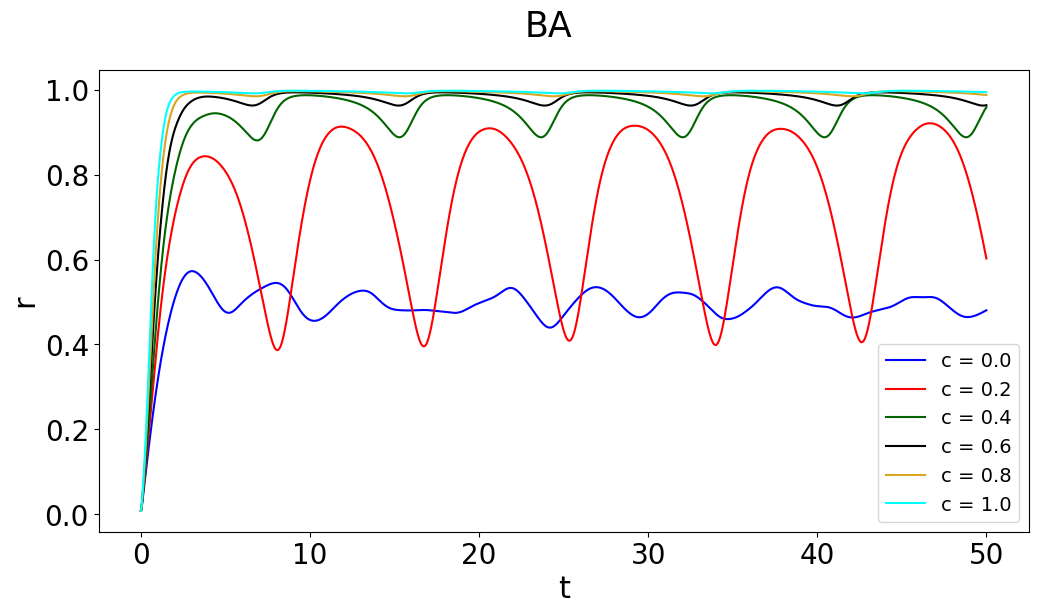

In [5]:
plot_many_r(ord2_1, ord2_2, ord2_3, ord2_4, ord2_5, ord2_6, dt, t_max, title2, 'c', c2)
#plot_many_r(ord2_1, ord2_4, ord2_5, ord2_6, dt, t_max, title2, 'c2', c2)

In [6]:
final_state1 = act_mat1[:,-1]

final_state2_1 = act_mat2_1[:,-1]
final_state2_2 = act_mat2_2[:,-1]
final_state2_3 = act_mat2_3[:,-1]
final_state2_4 = act_mat2_4[:,-1]
final_state2_5 = act_mat2_5[:,-1]
final_state2_6 = act_mat2_6[:,-1]

H1 = H_J_single_simple(c1, final_state1, graph1, coupling_ext, omega_f, t_max)
H2_1 = H_J_single_simple(c2[0], final_state2_1, graph2, coupling_ext, omega_f, t_max)
H12_1 = H_J_simple(c1, c2[0], final_state1, final_state2_1, graph1, graph2, coupling_ext, omega_f, t_max)

H2_2 = H_J_single_simple(c2[1], final_state2_2, graph2, coupling_ext, omega_f, t_max)
H12_2 = H_J_simple(c1, c2[1], final_state1, final_state2_2, graph1, graph2, coupling_ext, omega_f, t_max)

H2_3 = H_J_single_simple(c2[2], final_state2_3, graph2, coupling_ext, omega_f, t_max)
H12_3 = H_J_simple(c1, c2[2], final_state1, final_state2_3, graph1, graph2, coupling_ext, omega_f, t_max)

H2_4 = H_J_single_simple(c2[3], final_state2_4, graph2, coupling_ext, omega_f, t_max)
H12_4 = H_J_simple(c1, c2[3], final_state1, final_state2_4, graph1, graph2, coupling_ext, omega_f, t_max)

H2_5 = H_J_single_simple(c2[4], final_state2_5, graph2, coupling_ext, omega_f, t_max)
H12_5 = H_J_simple(c1, c2[4], final_state1, final_state2_5, graph1, graph2, coupling_ext, omega_f, t_max)

H2_6 = H_J_single_simple(c2[5], final_state2_6, graph2, coupling_ext, omega_f, t_max)
H12_6 = H_J_simple(c1, c2[5], final_state1, final_state2_6, graph1, graph2, coupling_ext, omega_f, t_max)

In [16]:
tau_min = 0.0001
tau_max_s = 200
tau_max_c = 13
tau_points_s = 250
tau_points_c = 1

In [17]:
tau_min1 = tau_min
tau_max_s1 = tau_max_s
tau_points_s1 = tau_points_s
taur_s1 = np.geomspace(tau_min1, tau_max_s1, tau_points_s1)

tau_max_c1 = tau_max_c
tau_points_c1 = tau_points_c
taur_c1 = np.linspace(tau_min1, tau_max_c1, tau_points_c1)


S1_1 = []
S2_1 = []
S12_1 = []

C1_1 = []
C2_1 = []
C12_1 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s1):
    S1_1.append(network_thermodynamics_S(H1, tau))
    S2_1.append(network_thermodynamics_S(H2_1, tau))
    S12_1.append(network_thermodynamics_S(H12_1, tau))

# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c1):
#     C1_1.append(network_thermodynamics_C(H1, tau))
#     C2_1.append(network_thermodynamics_C(H2_1, tau))
#     C12_1.append(network_thermodynamics_C(H12_1, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [18]:
tau_min2 = tau_min

tau_max_s2 = tau_max_s
tau_points_s2 = tau_points_s
taur_s2 = np.geomspace(tau_min2, tau_max_s2, tau_points_s2)

tau_max_c2 = tau_max_c
tau_points_c2 = tau_points_c
taur_c2 = np.linspace(tau_min2, tau_max_c2, tau_points_c2)


S1_2 = []
S2_2 = []
S12_2 = []

C1_2 = []
C2_2 = []
C12_2 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s2):
    S1_2.append(network_thermodynamics_S(H1, tau))
    S2_2.append(network_thermodynamics_S(H2_2, tau))
    S12_2.append(network_thermodynamics_S(H12_2, tau))

# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c2):
#     C1_2.append(network_thermodynamics_C(H1, tau))
#     C2_2.append(network_thermodynamics_C(H2_2, tau))
#     C12_2.append(network_thermodynamics_C(H12_2, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [19]:
tau_min3 = tau_min
tau_max_s3 = tau_max_s
tau_points_s3 = tau_points_s
taur_s3 = np.geomspace(tau_min3, tau_max_s3, tau_points_s3)

tau_max_c3 = tau_max_c
tau_points_c3 = tau_points_c
taur_c3 = np.linspace(tau_min3, tau_max_c3, tau_points_c3)


S1_3 = []
S2_3 = []
S12_3 = []

C1_3 = []
C2_3 = []
C12_3 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s3):
    S1_3.append(network_thermodynamics_S(H1, tau))
    S2_3.append(network_thermodynamics_S(H2_3, tau))
    S12_3.append(network_thermodynamics_S(H12_3, tau))

# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c3):
#     C1_3.append(network_thermodynamics_C(H1, tau))
#     C2_3.append(network_thermodynamics_C(H2_3, tau))
#     C12_3.append(network_thermodynamics_C(H12_3, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [20]:
tau_min4 = tau_min
tau_max_s4 = tau_max_s
tau_points_s4 = tau_points_s
taur_s4 = np.geomspace(tau_min4, tau_max_s4, tau_points_s4)

tau_max_c4 = tau_max_c
tau_points_c4 = tau_points_c
taur_c4 = np.linspace(tau_min4, tau_max_c4, tau_points_c4)


# S1_4 = []
# S2_4 = []
# S12_4 = []

C1_4 = []
C2_4 = []
C12_4 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s4):
#     S1_4.append(network_thermodynamics_S(H1, tau))
#     S2_4.append(network_thermodynamics_S(H2_4, tau))
#     S12_4.append(network_thermodynamics_S(H12_4, tau))

# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c4):
    C1_4.append(network_thermodynamics_C(H1, tau))
    C2_4.append(network_thermodynamics_C(H2_4, tau))
    C12_4.append(network_thermodynamics_C(H12_4, tau))

100% |########################################################################|


In [21]:
tau_min5 = tau_min
tau_max_s5 = tau_max_s
tau_points_s5 = tau_points_s
taur_s5 = np.geomspace(tau_min5, tau_max_s5, tau_points_s5)

tau_max_c5 = tau_max_c
tau_points_c5 = tau_points_c
taur_c5 = np.linspace(tau_min5, tau_max_c5, tau_points_c5)

# S1_5 = []
# S2_5 = []
# S12_5 = []

C1_5 = []
C2_5 = []
C12_5 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s5):
#     S1_5.append(network_thermodynamics_S(H1, tau))
#     S2_5.append(network_thermodynamics_S(H2_5, tau))
#     S12_5.append(network_thermodynamics_S(H12_5, tau))

# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c5):
    C1_5.append(network_thermodynamics_C(H1, tau))
    C2_5.append(network_thermodynamics_C(H2_5, tau))
    C12_5.append(network_thermodynamics_C(H12_5, tau))

100% |########################################################################|


In [22]:
tau_min6 = tau_min
tau_max_s6 = tau_max_s
tau_points_s6 = tau_points_s
taur_s6 = np.geomspace(tau_min6, tau_max_s6, tau_points_s6)

tau_max_c6 = tau_max_c
tau_points_c6 = tau_points_c
taur_c6 = np.linspace(tau_min6, tau_max_c6, tau_points_c6)

# S1_6 = []
# S2_6 = []
# S12_6 = []

C1_6 = []
C2_6 = []
C12_6 = []

# print('Beginning of entropy calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_s6):
#     S1_6.append(network_thermodynamics_S(H1, tau))
#     S2_6.append(network_thermodynamics_S(H2_6, tau))
#     S12_6.append(network_thermodynamics_S(H12_6, tau))

# print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c6):
    C1_6.append(network_thermodynamics_C(H1, tau))
    C2_6.append(network_thermodynamics_C(H2_6, tau))
    C12_6.append(network_thermodynamics_C(H12_6, tau))

100% |########################################################################|


In [14]:
C_12 = []
C_12.append(C12_1); C_12.append(C12_2);C_12.append(C12_3); C_12.append(C12_4);C_12.append(C12_5); C_12.append(C12_6)
tau_max = []
for i in range(len(C_12)):
    tau_max.append(taur_c4[C_12[i].index(max(C_12[i]))])
print(tau_max)

ValueError: max() iterable argument is empty

<Axes: xlabel='$\\tau$', ylabel='S'>

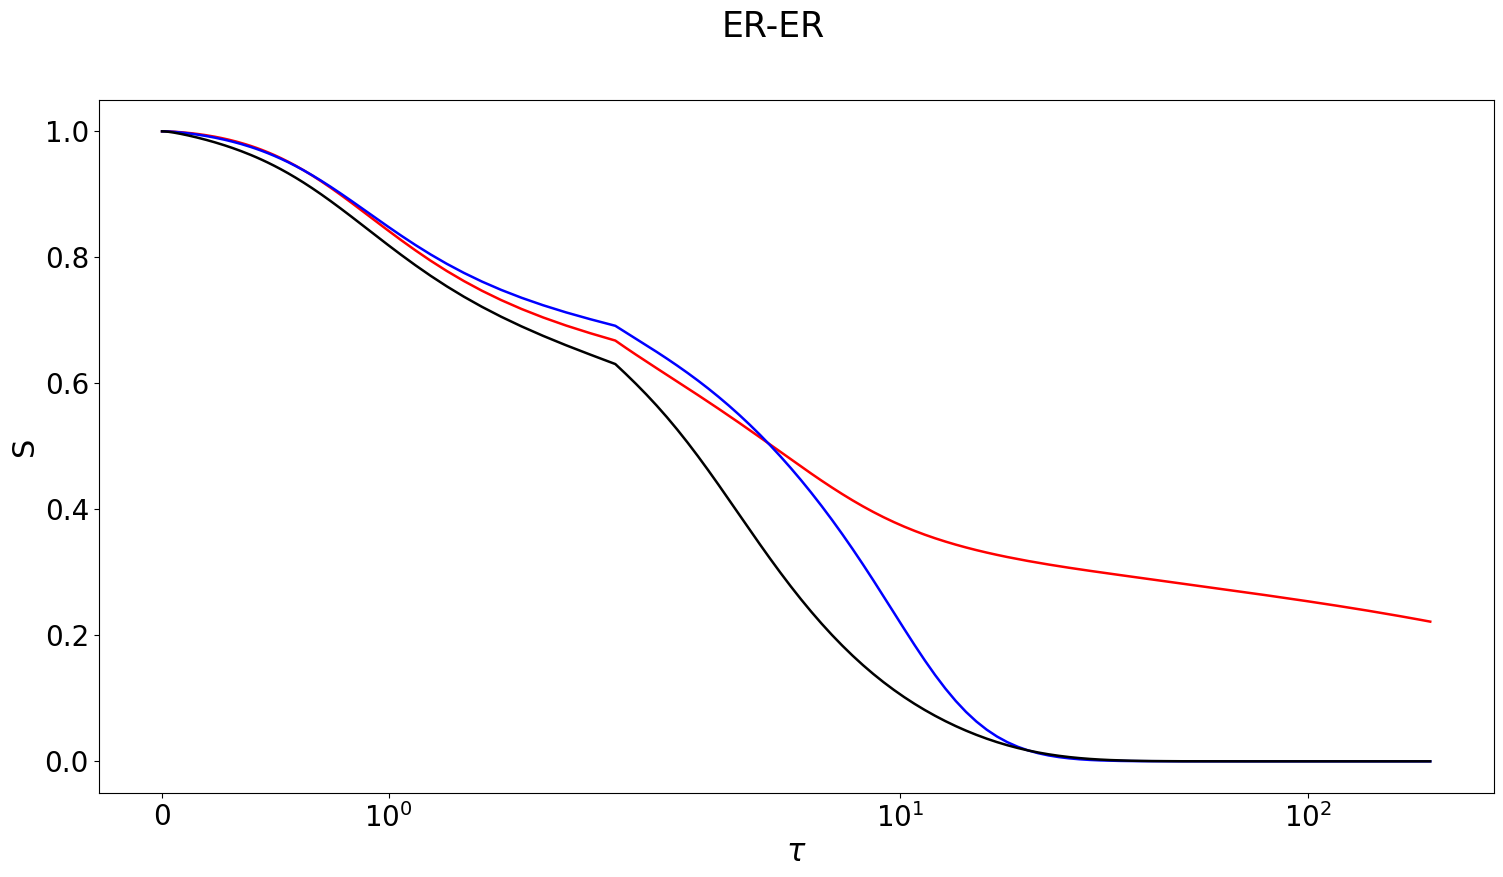

In [23]:
plot_entropy(taur_s1, taur_s2, taur_s3, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, c2, f'ER-ER', 'c2', 'symlog')

#plot_S(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2')
#plot_S_n(taur_s1, taur_s2, taur_s3, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, c2, f'{title1}-{title2}', 'c2', 'symlog')
#plot_S_n(taur_s1, taur_s2, taur_s4, taur_s4, S1_4, S2_4, S12_4, S1_5, S2_5, S12_5, S1_6, S2_6, S12_6, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2', 'symlog')
# plot_C_n(taur_c1, taur_c2, taur_c3, taur_c4, taur_c5, taur_c6, C1_1, C2_1, C12_1, C1_2, C2_2, C12_2, C1_3, C2_3, C12_3, C1_4, C2_4, C12_4,
#          C1_5, C2_5, C12_5, C1_6, C2_6, C12_6, c2, f'{title1}-{title2}', 'c2')
#plot_S_single(taur_s1, S2_1, None, 'lol')
# plot_S_n_inset(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2', 'symlog',
#                ord2_1, ord2_2, ord2_3, ord2_4, dt, t_max, None, 'c2', c2)

In [ ]:
# Mixed
max1 = [2.65, 6.38, 5.85, 9.38, 9.74, 9.46]# punto di domanda?
max2 = [2.52, 3.23, 3.73, 4.75, 4.75, 4.95]
max3 = [2.36, 6.33, 7.74, 7.99, 7.89, 7.54]
max4 = [2.34, 7.61, 5.50, 8.14, 6.93, 7.61]
max5 = [2.82, 6.24, 7.25, 7.65, 8.15, 8.36]

M1 = []
M1.append(max1);M1.append(max2);M1.append(max3);M1.append(max4);M1.append(max5);
M1 = np.array(M1)
# ER
max1 = [2.72, 5.74, 7.25, 6.34, 6.54, 6.75]
max2 = [2.71, 7.64, 5.83, 7.14, 9.45, 6.33]
max3 = [2.61, 6.13, 9.05, 11.76, 9.95, 9.95]
max4 = [2.21, 7.84, 5.73, 6.63, 5.83, 6.63]
max5 = [2.52, 6.04, 11.07, 9.06, 7.25, 9.66]

M2 = []
M2.append(max1);M2.append(max2);M2.append(max3);M2.append(max4);M2.append(max5);
M2 = np.array(M2)
# BA

max1 = [1.82, 6.16, 4.24, 7.88, 6.77, 6.46]
max2 = [1.91, 1.31, 1.00, 1.00, 9.37, 10.94]
max3 = [1.91, 1.41, 5.82, 10.14, 8.13, 7.63] # tutti sus a parte il primo
max4 = [1.81, 1.41, 4.64, 5.64, 5.85, 5.44]
max5 = [2.12, 1.61, 9.27, 6.75, 7.86, 7.96]

M3 = []
M3.append(max1);M3.append(max2);M3.append(max3);M3.append(max4);M3.append(max5);
M3 = np.array(M3)

In [ ]:
print(M1)
print(np.mean(M1, axis=0))
print(np.std(M1, axis=0))

print(M2)
print(np.mean(M2, axis=0))
print(np.std(M2, axis=0))

print(M3)
print(np.mean(M3, axis=0))
print(np.std(M3, axis=0))

[[2.65 6.38 5.85 9.38 9.74 9.46]
 [2.52 3.23 3.73 4.75 4.75 4.95]
 [2.36 6.33 7.74 7.99 7.89 7.54]
 [2.34 7.61 5.5  8.14 6.93 7.61]
 [2.82 6.24 7.25 7.65 8.15 8.36]]
[2.538 5.958 6.014 7.582 7.492 7.584]
[0.18070971 1.45375926 1.41523991 1.5320235  1.64190621 1.48742193]
[[ 2.72  5.74  7.25  6.34  6.54  6.75]
 [ 2.71  7.64  5.83  7.14  9.45  6.33]
 [ 2.61  6.13  9.05 11.76  9.95  9.95]
 [ 2.21  7.84  5.73  6.63  5.83  6.63]
 [ 2.52  6.04 11.07  9.06  7.25  9.66]]
[2.554 6.678 7.786 8.186 7.804 7.864]
[0.18682612 0.87896303 2.03581532 2.02288507 1.61962465 1.59335621]
[[ 1.82  6.16  4.24  7.88  6.77  6.46]
 [ 1.91  1.31  1.    1.    9.37 10.94]
 [ 1.91  1.41  5.82 10.14  8.13  7.63]
 [ 1.81  1.41  4.64  5.64  5.85  5.44]
 [ 2.12  1.61  9.27  6.75  7.86  7.96]]
[1.914 2.38  4.994 6.282 7.596 7.686]
[0.111463   1.89251156 2.66879448 3.03211082 1.20272358 1.85549562]
